<a href="https://colab.research.google.com/github/newbie0309/DSCover-2022-2-Main-Project/blob/main/wavelet_sarima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##데이터 업로드 및 정리

In [ ]:
import pandas as pd
from datetime import datetime, timedelta

all_df = pd.read_csv(
    '/content/drive/MyDrive/2022-2 Dscover 프로젝트/final project/한국가스공사_시간별 공급량_20181231.csv', encoding = 'cp949',
    header=0, 
    infer_datetime_format=True,
     parse_dates=['연월일'], 
     index_col=['연월일'])

In [ ]:
#날짜별로 합
daily_groups = all_df.resample('D')
daily_data = daily_groups.sum()
# summarize
print(daily_data.shape)
print(daily_data.head())

(2191, 2)
              시간         공급량
연월일                         
2013-01-01  2100  329071.952
2013-01-02  2100  392558.872
2013-01-03  2100  430133.984
2013-01-04  2100  422635.256
2013-01-05  2100  384039.000


In [ ]:
daily_data = daily_data.drop(columns = ['시간'])

In [ ]:
daily_data

,공급량
연월일,
2013-01-01,329071.952
2013-01-02,392558.872
2013-01-03,430133.984
2013-01-04,422635.256
2013-01-05,384039.000
...,...
2018-12-27,383718.778
2018-12-28,407755.465
2018-12-29,370960.691


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

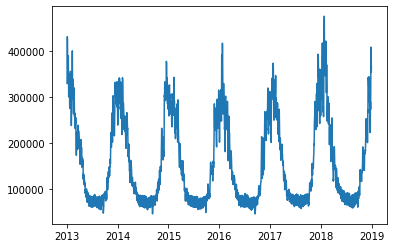

In [ ]:
plt.plot(daily_data)

#wavelet 분해 그래프 표현 
  - wavelet분해를 시도했는데 일단 그래프는 그려짐 
  - 기존의 그래프와 비슷하게 그려짐(변동성이 매우 크다고 볼 수는 없음) -> 변동성이 커서 웨이블렛 분해로 여러 차원으로 분해가 되면 garch와 arima를 함께 쓰려 했는데 굳이 그러지 않아도 될 것 같음


In [ ]:
import pywt

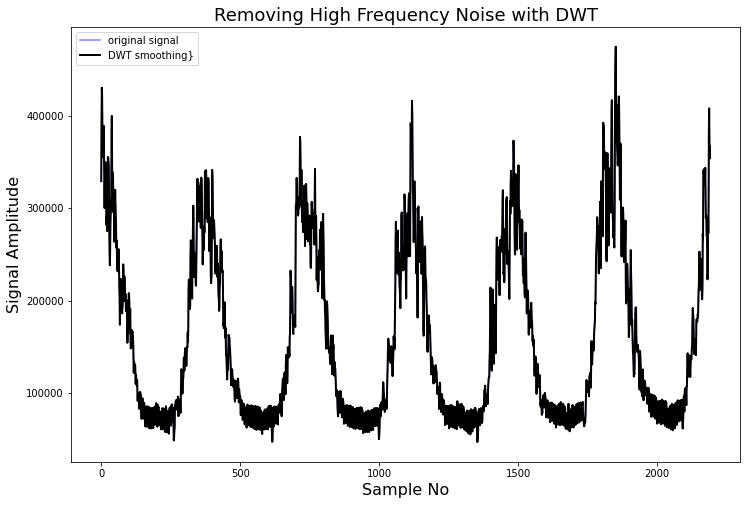

In [ ]:
df = daily_data
signal = df.values
 
def lowpassfilter(signal, thresh = 0.7, wavelet="db4"):
    thresh = thresh*np.nanmax(signal)
    coeff = pywt.wavedec(signal, wavelet, mode="per" )
    coeff[1:] = (pywt.threshold(i, value=thresh, mode="soft" ) for i in coeff[1:])
    reconstructed_signal = pywt.waverec(coeff, wavelet, mode="per" )
    return reconstructed_signal
 
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(signal, color="b", alpha=0.5, label='original signal')
rec = lowpassfilter(signal, 0.4)
ax.plot(rec, 'k', label='DWT smoothing}', linewidth=2)
ax.legend()
ax.set_title('Removing High Frequency Noise with DWT', fontsize=18)
ax.set_ylabel('Signal Amplitude', fontsize=16)
ax.set_xlabel('Sample No', fontsize=16)
plt.show()


#SARIMA

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX 
from statsmodels.tsa.stattools import adfuller 
import matplotlib.pyplot as plt 
import matplotlib 
import numpy as np 
import pandas as pd 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
from sklearn.metrics import median_absolute_error, mean_squared_log_error
%matplotlib inline

In [ ]:
data = daily_data

In [ ]:
data.tail()

,공급량
연월일,
2018-12-27,383718.778
2018-12-28,407755.465
2018-12-29,370960.691
2018-12-30,353624.546
2018-12-31,366700.508


<Figure size 864x360 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text

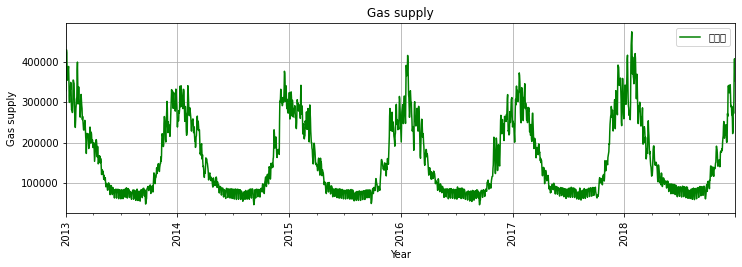

In [ ]:
plt.figure(figsize = [12,5]);
data.plot(y = '공급량', figsize = (12, 3.5), legend = True, color = 'g')
plt.title('Gas supply')
plt.xlabel('Year')
plt.ylabel('Gas supply')
plt.xticks(rotation = 90)
plt.grid(True)
plt.show()

In [ ]:
data_result = adfuller(data['공급량'])
print(f'ADF Statistics: {data_result[0]}')
print(f'p -value: {data_result[1]}') #p-value가 0.05이하이므로, stationary 충족(데이터가 일정한 분포를 따른다는 말)

ADF Statistics: -3.0745767959121744
p -value: 0.02849272775536731


In [ ]:
best_model = SARIMAX(data['공급량'], order = (2,1,1), seasonal_order = (2,1,1,52)).fit(dis = 1)
print(best_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                공급량   No. Observations:                 2191
Model:             SARIMAX(2, 1, 1)x(2, 1, 1, 52)   Log Likelihood              -23802.362
Date:                            Wed, 23 Nov 2022   AIC                          47618.724
Time:                                    02:43:33   BIC                          47658.397
Sample:                                01-01-2013   HQIC                         47633.242
                                     - 12-31-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9123      0.049     18.519      0.000       0.816       1.009
ar.L2         -0.4162      0.024   

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_te

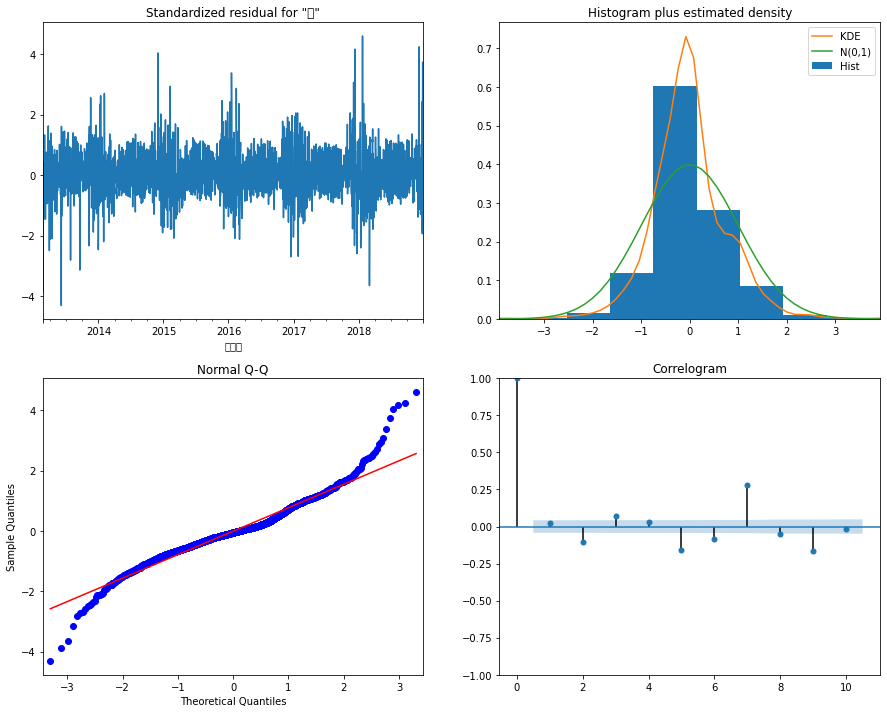

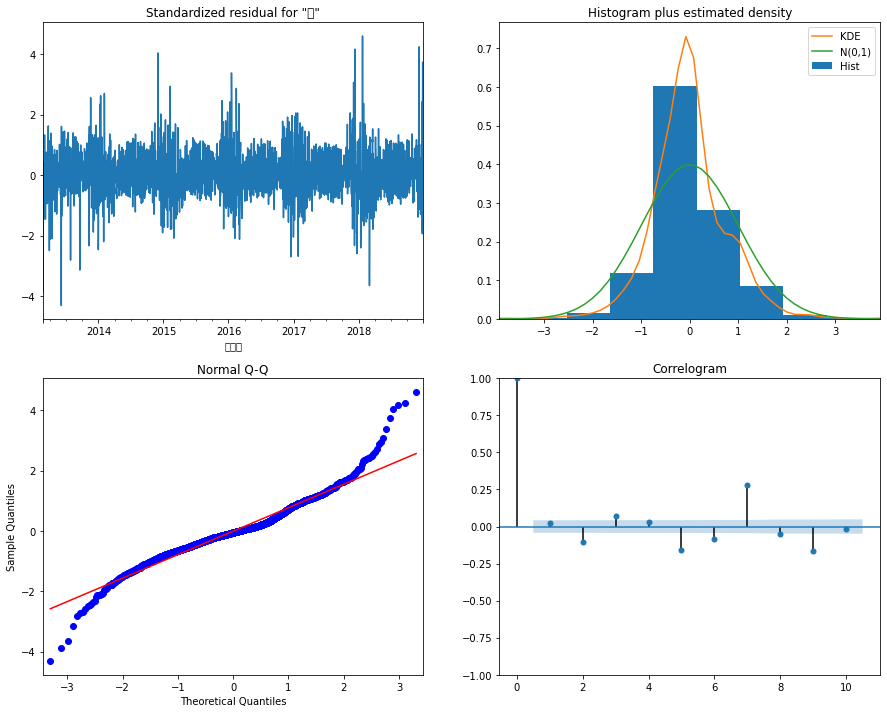

In [ ]:
best_model.plot_diagnostics(figsize = (15,12))

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text

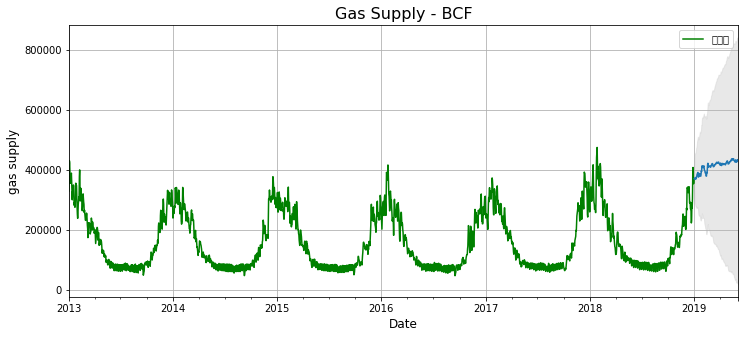

In [ ]:
forecast_values = best_model.get_forecast(steps = 156)

forecast_ci = forecast_values.conf_int()

ax = data.plot(y = '공급량', figsize = (12,5), legend = True, color = 'g')

forecast_values.predicted_mean.plot(ax = ax, label = 'Forecasts', figsize = (12, 5), grid = True)
ax.fill_between(forecast_ci.index, 
                forecast_ci.iloc[:, 0], 
                forecast_ci.iloc[:, 1], color = '#D3D3D3', alpha = .5)

plt.title('Gas Supply - BCF', size = 16)
plt.ylabel('gas supply', size = 12)
plt.xlabel('Date', size = 12)
#plt.legend(loc = 'upper center', prop = {'size' : 12})

#ax.text(570, 100, 'Forecasted Values Until 2023', fontsize = 11, color = 'blue')
plt.show()